# IEEE-CIS fraud detection 

## 데이터 불러오기 

In [2]:
#불러오고 보자.. 
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


** 순서 ! **

2. 데이터 전처리 : feature, target 분리 

```python
features = train_transaction.iloc[:, 2:]
target = train_transaction.iloc[:, 1]
```


In [3]:
train_identity = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/train_identity.csv')
train_transaction = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/train_transaction.csv')

pd.set_option('display.max_columns', None)
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
train_transaction.iloc[:, 0].name

'TransactionID'

<AxesSubplot:xlabel='isFraud'>

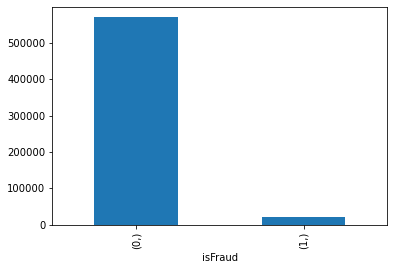

In [5]:
# is fraud 의 비율 : 3.6%
ax = train_transaction[['isFraud']].value_counts()
ax.plot.bar()

In [6]:
pd.set_option('display.max_columns', None)
train_identity.head(20).sort_values('TransactionID')

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.00,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.00,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.00,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.00,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.00,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.00,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.00,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.00,NotFound,52.0,NaN,New,NotFound,225.0,NaN,484.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [7]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

### Column 선정

#### C-columns

In [8]:
train_transaction[[f'C{i}' for i in range(1,15) ]].nunique()

C1     1657
C2     1216
C3       27
C4     1260
C5      319
C6     1328
C7     1103
C8     1253
C9      205
C10    1231
C11    1476
C12    1199
C13    1597
C14    1108
dtype: int64

In [9]:
sorted(train_transaction['C3'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0]

C value 컬럼 특징
- 결측치 없음
- C3 의 nunique : 27 ( 0 ~ 26)
- 

In [10]:
#Alphabet - value 들간 상관계수가 심상치 않아보인다 - 상관계수가 높은 것들은 제거 가능 
c_column_df = train_transaction[[f'C{i}' for i in range(1,15) ]]
C_corr = c_column_df.corr()
C_corr

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
C1,1.000000,0.995089,-0.003467,0.967800,0.165862,0.982238,0.926258,0.967746,0.175999,0.958202,0.996515,0.927939,0.774603,0.951761
C2,0.995089,1.000000,-0.003339,0.972134,0.126540,0.974845,0.938867,0.975863,0.133566,0.970624,0.993898,0.940258,0.751221,0.936148
C3,-0.003467,-0.003339,1.000000,-0.001720,-0.008101,-0.004711,-0.001730,-0.001203,-0.010074,-0.001494,-0.003583,-0.001763,-0.007747,-0.005091
C4,0.967800,0.972134,-0.001720,1.000000,-0.012842,0.962319,0.895092,0.959995,-0.015970,0.952466,0.974547,0.894619,0.644549,0.907676
C5,0.165862,0.126540,-0.008101,-0.012842,1.000000,0.232409,-0.009970,-0.011654,0.925786,-0.011846,0.168862,-0.009875,0.717509,0.378950
C6,0.982238,0.974845,-0.004711,0.962319,0.232409,1.000000,0.858583,0.921972,0.250695,0.914440,0.991105,0.858182,0.808531,0.984201
C7,0.926258,0.938867,-0.001730,0.895092,-0.009970,0.858583,1.000000,0.982983,-0.012399,0.985062,0.915209,0.999489,0.632394,0.794701
C8,0.967746,0.975863,-0.001203,0.959995,-0.011654,0.921972,0.982983,1.000000,-0.014492,0.996970,0.962722,0.983027,0.653245,0.860246
C9,0.175999,0.133566,-0.010074,-0.015970,0.925786,0.250695,-0.012399,-0.014492,1.000000,-0.014731,0.182446,-0.012212,0.704056,0.397396
C10,0.958202,0.970624,-0.001494,0.952466,-0.011846,0.914440,0.985062,0.996970,-0.014731,1.000000,0.956056,0.983817,0.653941,0.853009


In [71]:
c_column_df.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


points - 
평균, 4분위수들은 엄청 작은데 max 값은 엄청 큼.. 이상치는 아닐까? 

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


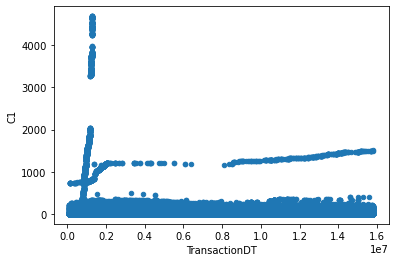

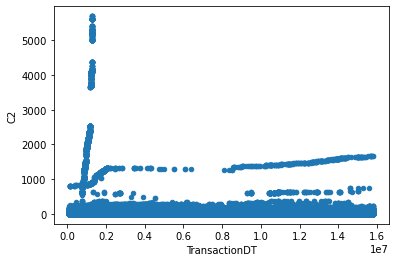

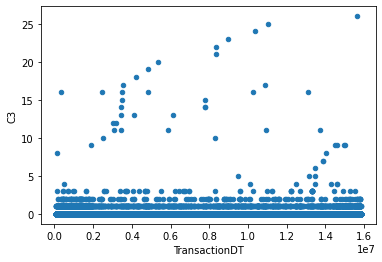

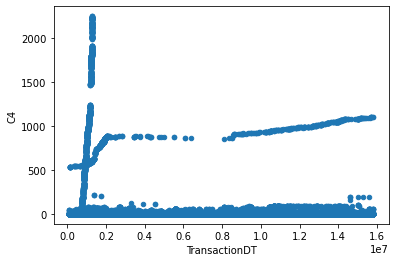

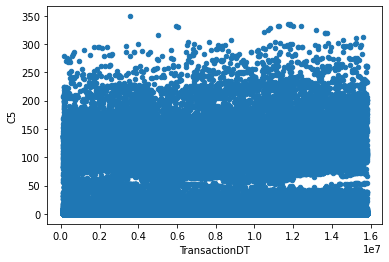

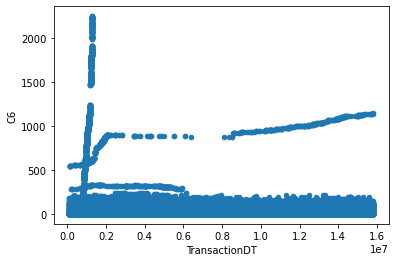

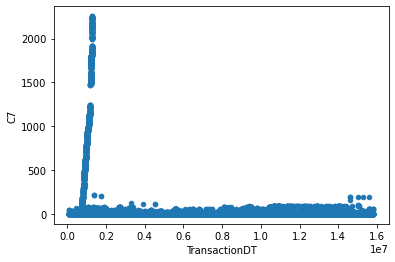

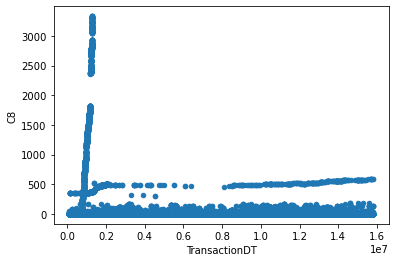

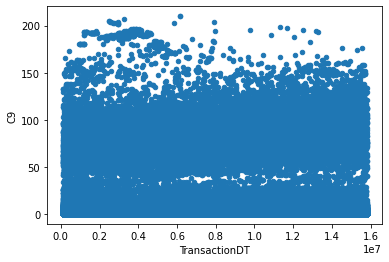

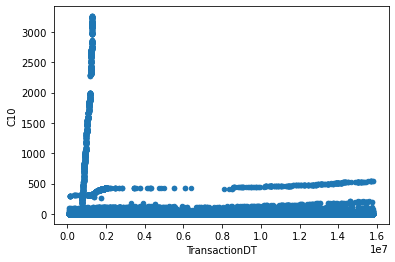

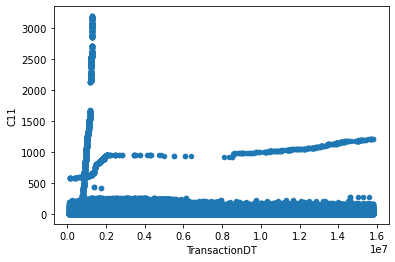

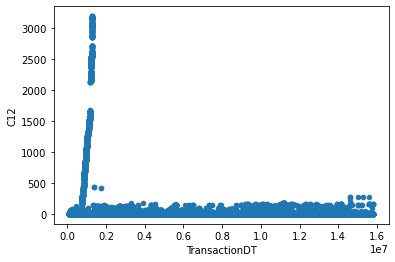

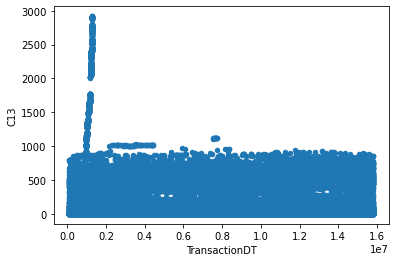

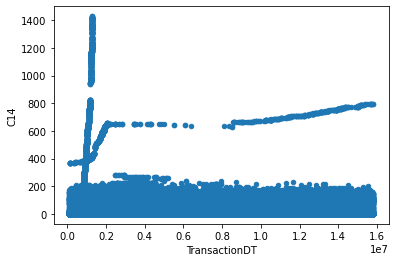

In [86]:
#컬럼 별 분포 확인
for i in range(1, 15):
    figures = train_transaction.plot( 'TransactionDT', f'C{i}',"scatter")
    
    print(figures)

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


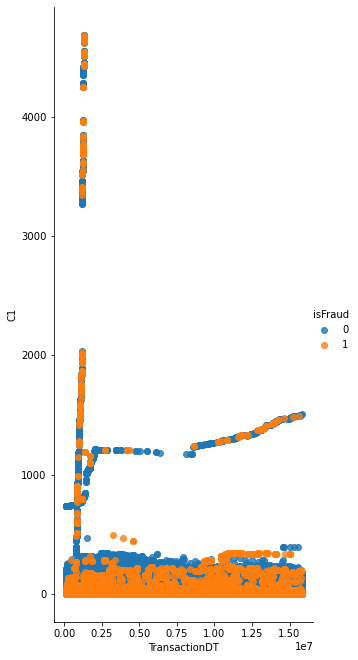

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


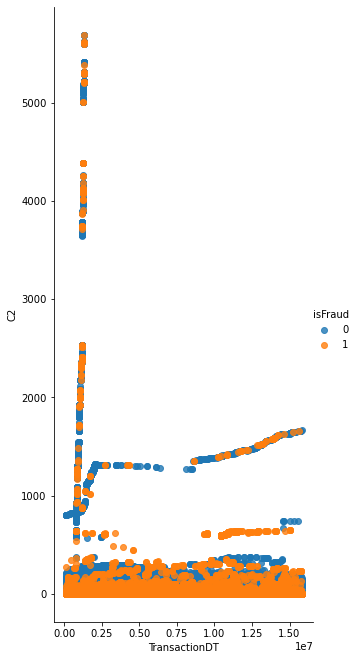

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


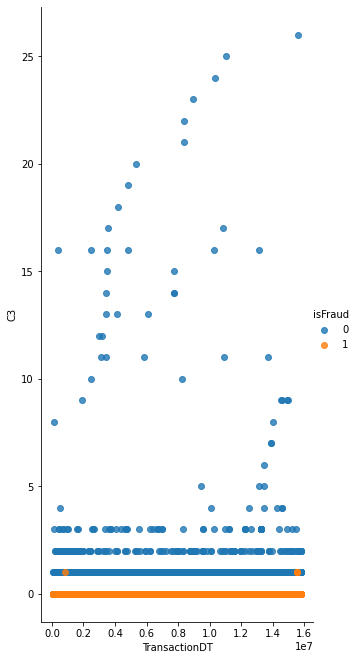

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


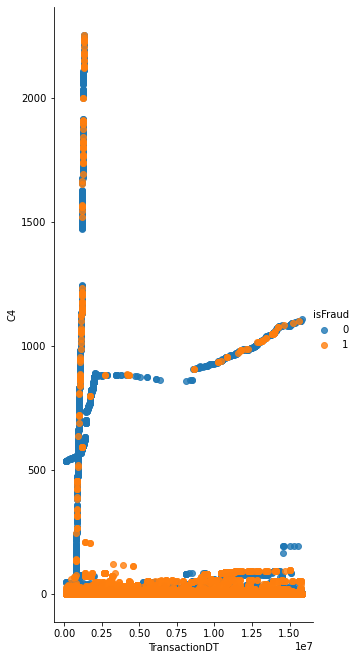

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


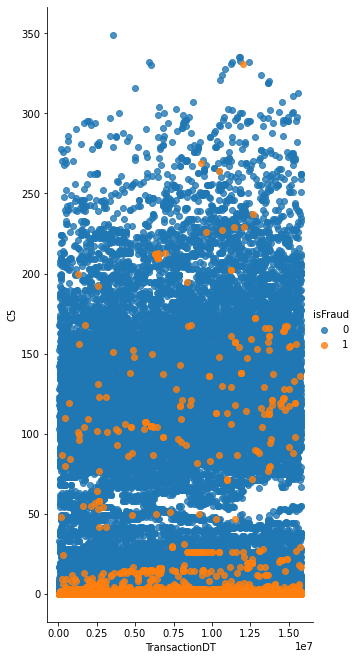

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


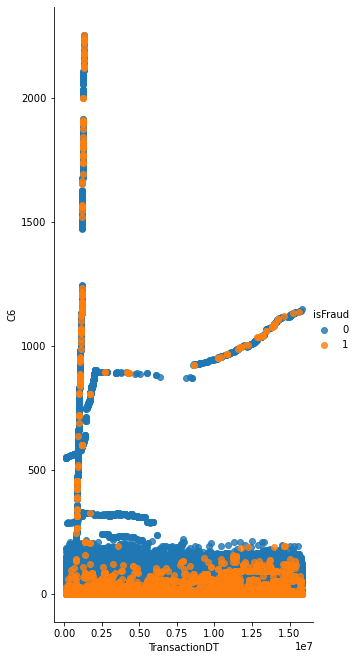

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


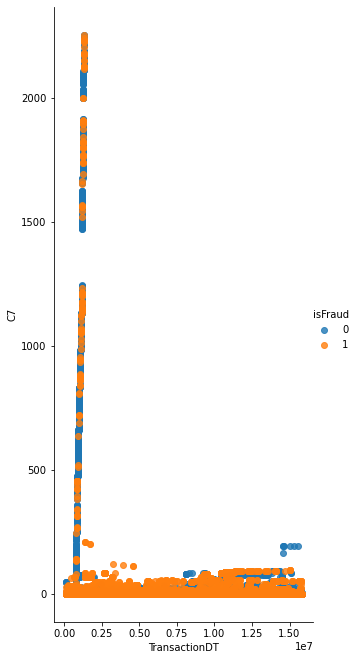

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


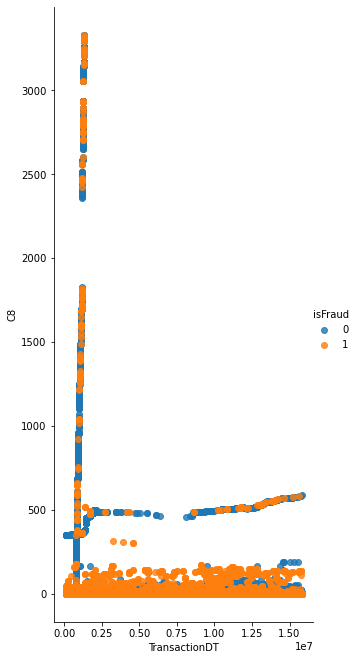

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


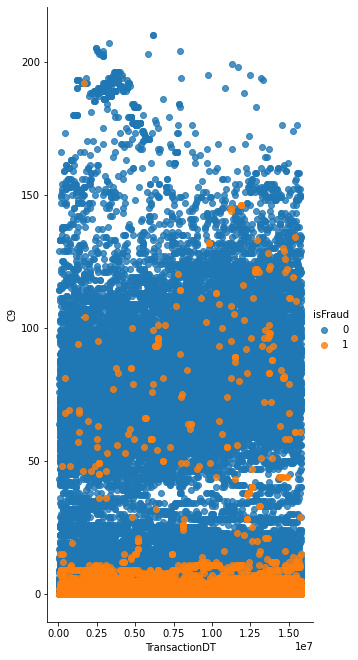

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


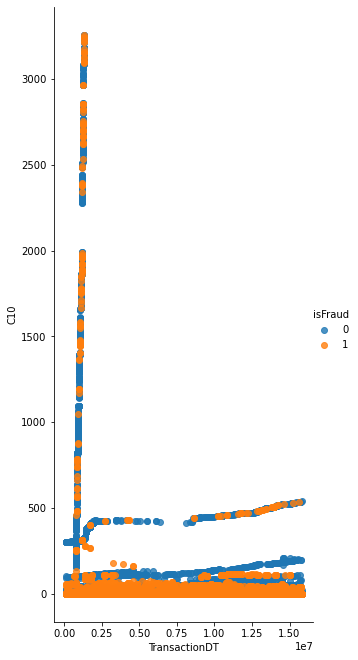

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


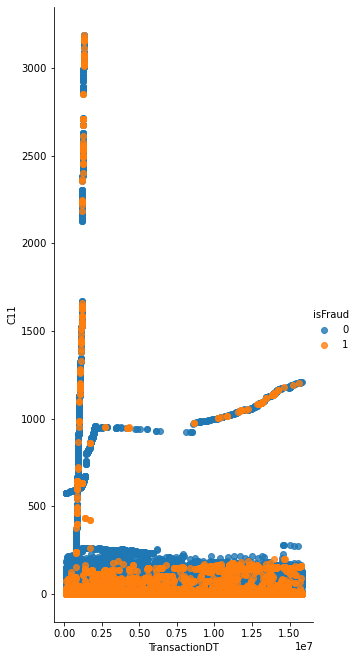

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


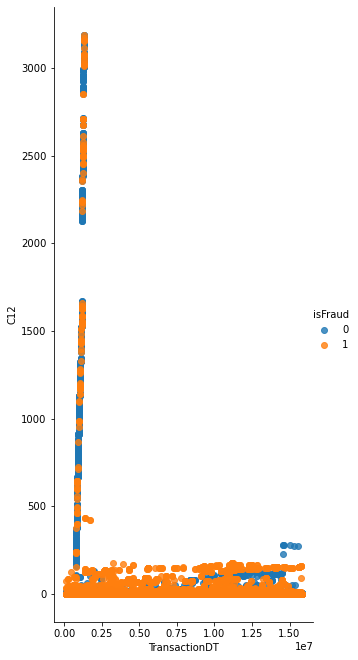

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


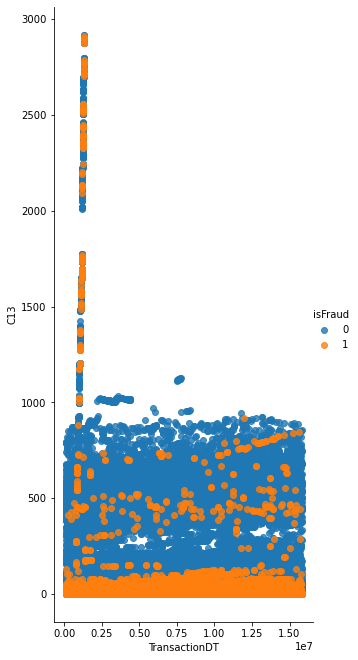

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


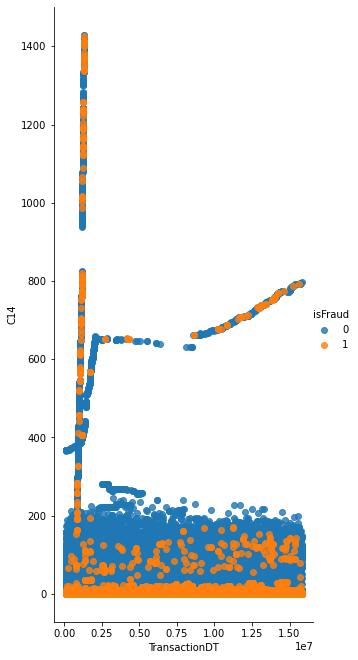

In [80]:
#graph trial - 결제 시각 & C-columns, 
for i in range(1, 15):
    sns.lmplot('TransactionDT', f'C{i}', train_transaction, hue='isFraud', fit_reg=False)
    fig = plt.gcf()
    fig.set_size_inches(5, 10)
    plt.show()

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


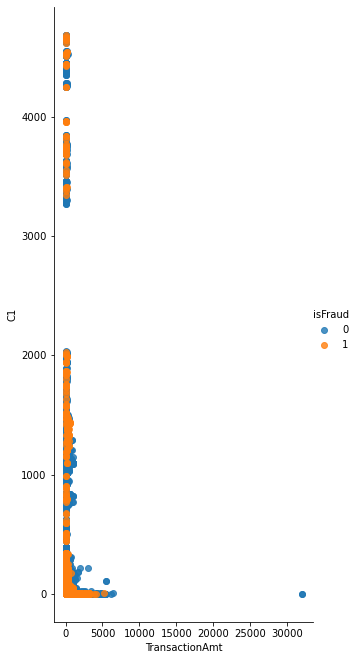

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


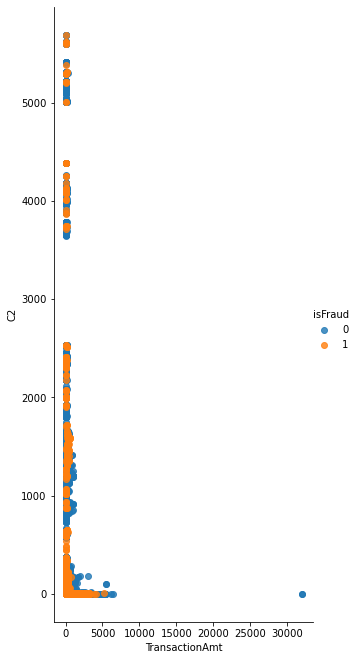

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


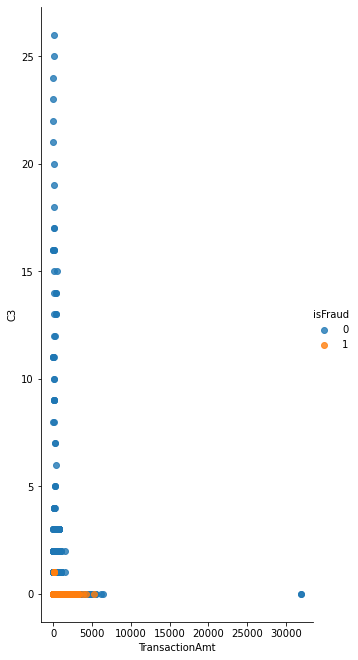

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


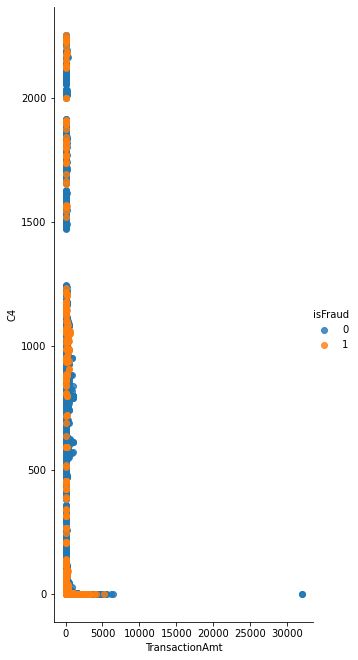

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


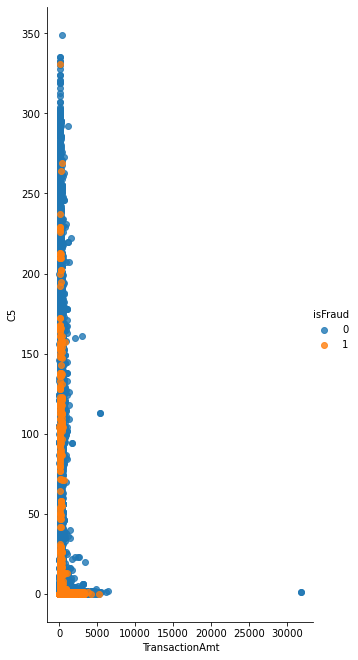

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


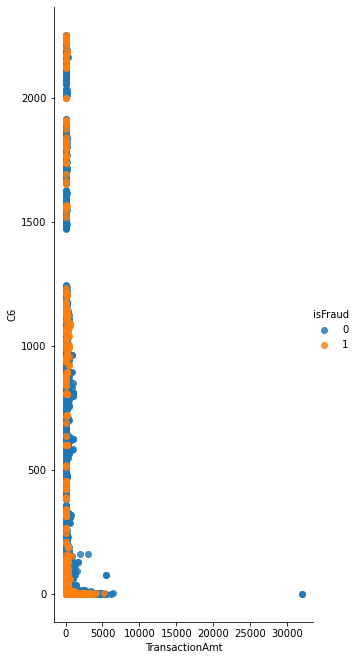

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


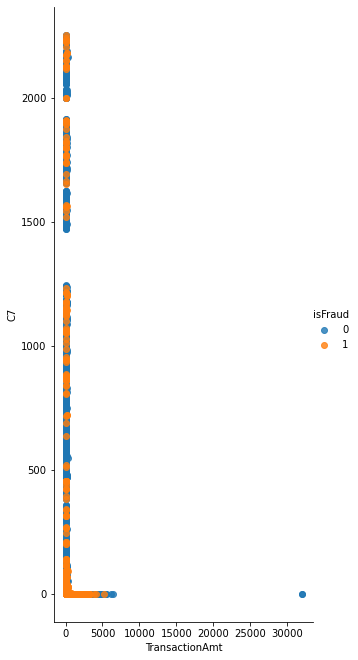

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


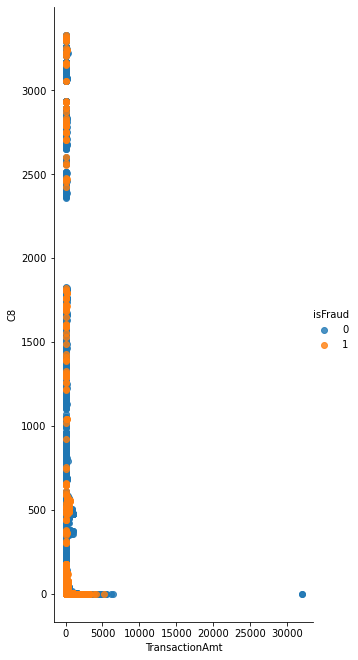

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


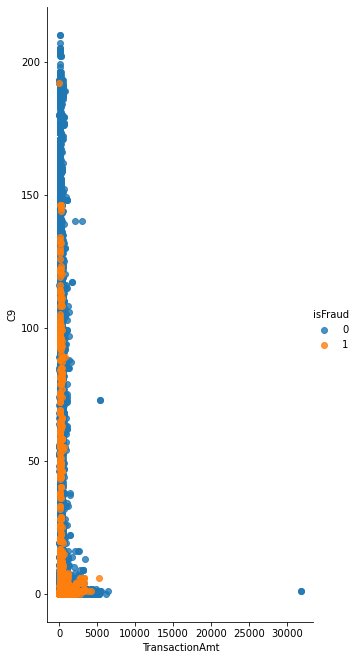

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


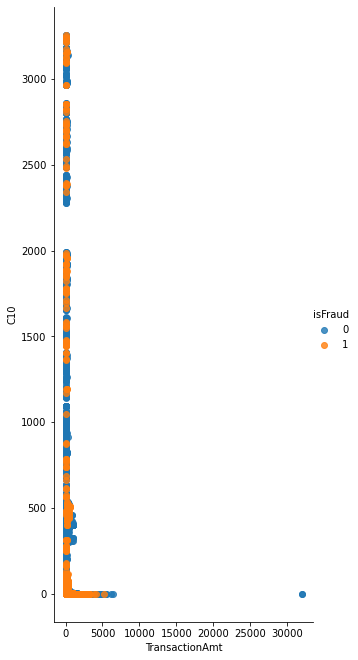

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


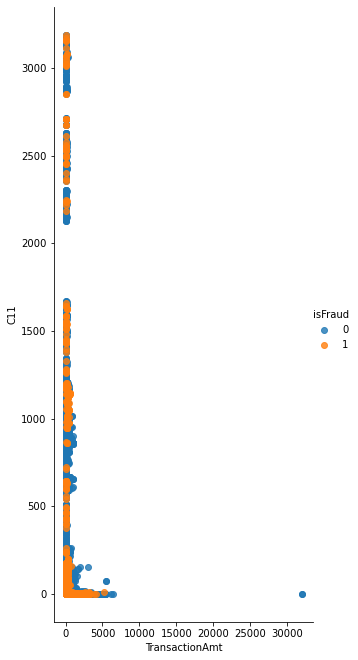

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


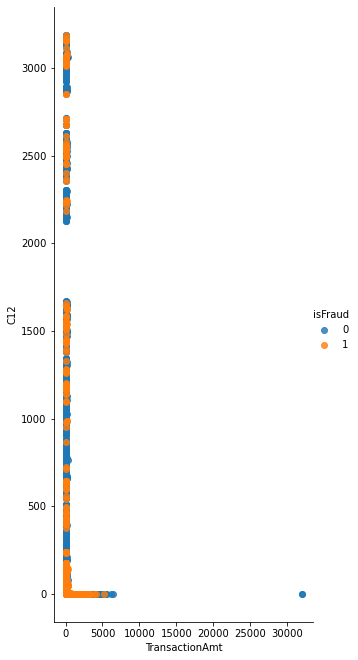

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


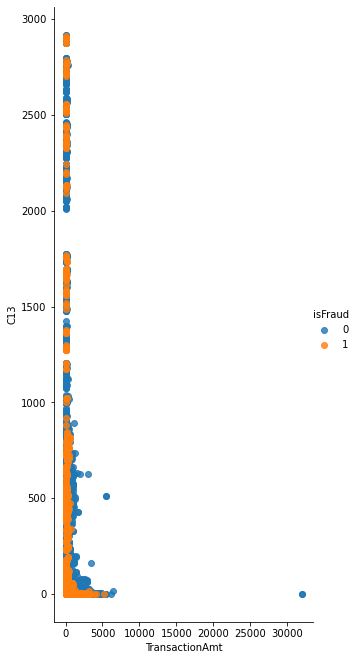

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


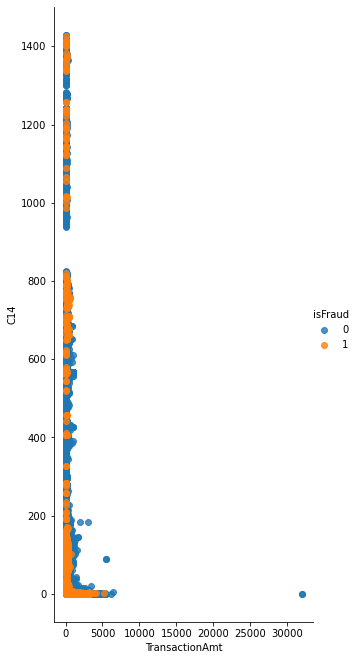

In [81]:
#graph trial - 결제 금액 & C-columns, 
for i in range(1, 15):
    sns.lmplot('TransactionAmt', f'C{i}', train_transaction, hue='isFraud', fit_reg=False)
    fig = plt.gcf()
    fig.set_size_inches(5, 10)
    plt.show()

<AxesSubplot:>

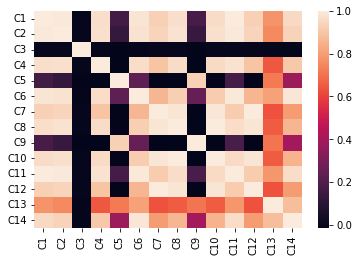

In [11]:
sns.heatmap(C_corr)

In [12]:
#VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(c_column_df.values, idx) for idx in range(c_column_df.shape[1])],
    "features": c_column_df.columns,
})

,VIF Factor,features
0,513.258502,C1
1,347.255671,C2
2,1.000764,C3
3,856.079141,C4
4,15.059040,C5
5,650.245064,C6
6,2953.148577,C7
7,1614.232379,C8
8,69.359449,C9
9,530.471117,C10


##### discussion of this block
사용할 feature / reason
- C2, C5, C13 : VIF 가 가장 낮은 하위 3개 column 
- C3, C5, C9 : TransactionDT, TransactionAmt 분포에서 isFraud 0 과 1 데이터의 분포가 다름 (그래프 참고)

2, 3, 5, 9, 13

In [82]:
#2, 3, 5, 9, 13 컬럼만 다중공선성 재확인 
c_column_df_2 = c_column_df[['C2', 'C3', 'C5', 'C9', 'C13']]
pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(c_column_df_2.values, idx) for idx in range(c_column_df_2.shape[1])],
    "features": c_column_df_2.columns,
})

,VIF Factor,features
0,13.191786,C2
1,1.000056,C3
2,12.684590,C5
3,8.651003,C9
4,28.550909,C13


In [83]:
c_column_df_2[['isFraud']] = train_transaction[['isFraud']]

c_column_df_2

/var/folders/5m/j1nv4tbn34l6v5n5hjqzx0c40000gn/T/ipykernel_1277/821979202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_column_df_2[['isFraud']] = train_transaction[['isFraud']]


,C2,C3,C5,C9,C13,isFraud
0,1.0,0.0,0.0,1.0,1.0,0
1,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,1.0,1.0,0
3,5.0,0.0,0.0,1.0,25.0,0
4,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...
590535,1.0,0.0,1.0,2.0,3.0,0
590536,1.0,0.0,0.0,1.0,1.0,0
590537,1.0,0.0,1.0,1.0,1.0,0
590538,1.0,0.0,0.0,2.0,5.0,0


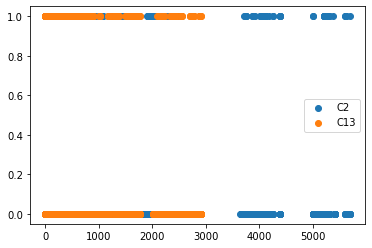

In [87]:
#많이 낮아졌지만, 아직 좀 큰가 싶으니 scatter 로 한 번 더 확인
plt.scatter(c_column_df_2["C2"], c_column_df_2["isFraud"], label="C2")
#plt.scatter(c_column_df_2["C3"], c_column_df_2["isFraud"], label="C3")
#plt.scatter(c_column_df_2["C5"], c_column_df_2["isFraud"], label="C5")
#plt.scatter(c_column_df_2["C9"], c_column_df_2["isFraud"], label="C9")
plt.scatter(c_column_df_2["C13"], c_column_df_2["isFraud"], label="C13")
plt.legend()
plt.show()

In [ ]:
#column drop 
tr_trans_pp =train_transaction.drop[['']]

#### D-columns

In [14]:
#D_corr
d_column_df = train_transaction[[f'D{i}' for i in range(1,16) ]]
d_corr = d_column_df.corr()
d_corr

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
D1,1.000000,0.981311,0.280423,0.585714,0.055236,0.525691,0.204924,0.050165,0.007667,0.562145,0.592629,0.521104,0.370195,0.154799,0.638957
D2,0.981311,1.000000,0.266112,0.570017,0.238365,0.601299,0.454152,0.275304,0.042867,0.525967,0.563220,0.668833,0.394203,0.196670,0.618243
D3,0.280423,0.266112,1.000000,0.149038,0.707425,0.304947,0.818080,0.194211,0.006983,0.092362,0.055433,0.349025,0.136444,0.029219,0.141511
D4,0.585714,0.570017,0.149038,1.000000,0.313650,0.956966,0.574098,0.162900,0.041768,0.636928,0.657797,0.999999,0.383803,0.135268,0.751546
D5,0.055236,0.238365,0.707425,0.313650,1.000000,0.551310,0.986496,0.249365,0.031991,0.116784,0.058496,0.565222,0.134026,0.064274,0.188533
D6,0.525691,0.601299,0.304947,0.956966,0.551310,1.000000,0.506527,0.185532,0.040119,0.463143,NaN,0.976834,0.419894,0.207166,0.700615
D7,0.204924,0.454152,0.818080,0.574098,0.986496,0.506527,1.000000,0.223624,0.025509,0.107557,NaN,0.553886,0.123023,0.035528,0.285026
D8,0.050165,0.275304,0.194211,0.162900,0.249365,0.185532,0.223624,1.000000,0.066085,0.168607,NaN,0.157520,0.521432,0.080991,0.226635
D9,0.007667,0.042867,0.006983,0.041768,0.031991,0.040119,0.025509,0.066085,1.000000,0.063333,NaN,0.026858,0.024555,0.042368,0.054647
D10,0.562145,0.525967,0.092362,0.636928,0.116784,0.463143,0.107557,0.168607,0.063333,1.000000,0.609652,0.018188,0.277137,0.336933,0.712252


<AxesSubplot:>

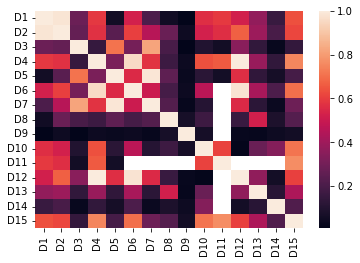

In [20]:
sns.heatmap(d_corr)

In [15]:
#isFraud 컬럼 추가 
d_column_df['isFraud'] = train_transaction['isFraud']
d_column_df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   D1       589271 non-null  float64
 1   D2       309743 non-null  float64
 2   D3       327662 non-null  float64
 3   D4       421618 non-null  float64
 4   D5       280699 non-null  float64
 5   D6       73187 non-null   float64
 6   D7       38917 non-null   float64
 7   D8       74926 non-null   float64
 8   D9       74926 non-null   float64
 9   D10      514518 non-null  float64
 10  D11      311253 non-null  float64
 11  D12      64717 non-null   float64
 12  D13      61952 non-null   float64
 13  D14      62187 non-null   float64
 14  D15      501427 non-null  float64
 15  isFraud  590540 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 72.1 MB


/var/folders/5m/j1nv4tbn34l6v5n5hjqzx0c40000gn/T/ipykernel_1277/2740378084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_column_df['isFraud'] = train_transaction['isFraud']


In [16]:
#각 컬럼별 scale 보기  - 결측치는 중간값으로 
d_column_df.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,isFraud
count,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,590540.000000
mean,94.347568,169.563231,28.343348,140.002441,42.335965,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,163.744579,0.034990
std,157.660387,177.315865,62.384721,191.096774,89.000144,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450,202.726660,0.183755
min,0.000000,0.000000,0.000000,-122.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000,-83.000000,0.000000
25%,0.000000,26.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.958333,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,97.000000,8.000000,26.000000,10.000000,0.000000,0.000000,37.875000,0.666666,15.000000,43.000000,0.000000,0.000000,0.000000,52.000000,0.000000
75%,122.000000,276.000000,27.000000,253.000000,32.000000,40.000000,17.000000,187.958328,0.833333,197.000000,274.000000,13.000000,0.000000,2.000000,314.000000,0.000000
max,640.000000,640.000000,819.000000,869.000000,819.000000,873.000000,843.000000,1707.791626,0.958333,876.000000,670.000000,648.000000,847.000000,878.000000,879.000000,1.000000


D column info 

D1 column info : min 0.0 , max 640.0 <br>
D2 column info : min 0.0 , max 640.0 <br>
D3 column info : min 0.0 , max 819.0 <br>
D4 column info : min -122.0 , max 869.0<br>
D5 column info : min 0.0 , max 819.0<br>
D6 column info : min -83.0 , max 873.0<br>
D7 column info : min 0.0 , max 843.0<br>
D8 column info : min 0.0 , max 1707.7916259765625<br>
D9 column info : min 0.0 , max 0.9583330154418944 -> <b> 0과 1 사이에 스케일링된 값? </b><br>
D10 column info : min 0.0 , max 876.0<br>
D11 column info : min -53.0 , max 670.0<br>
D12 column info : min -83.0 , max 648.0<br>
D13 column info : min 0.0 , max 847.0<br>
D14 column info : min -193.0 , max 878.0<br>
D15 column info : min -83.0 , max 879.0

In [17]:
#결측치 중간값으로 채워줌 
d_column_df_nona = d_column_df.fillna(d_column_df.median())


In [21]:
#다중공선성 확인 - 결측치 중간값으로 채운 값 
pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(d_column_df_nona.values, idx) for idx in range(d_column_df_nona.shape[1])],
    "features": d_column_df_nona.columns,
})

,VIF Factor,features
0,11.710104,D1
1,13.939404,D2
2,1.558233,D3
3,3.067211,D4
4,1.810886,D5
5,2.887898,D6
6,1.796151,D7
7,1.403199,D8
8,3.468320,D9
9,3.123414,D10


##### discussion of this block
사용할 feature / reason
- D1 :    
하지만 분포가 0~50에 몰려있어 scaling 필요해보임 
- D9 : column 들 중 가장 연관성 적음 하지만 결측치 처리 필요! 

사용할 feature / reason
- D2: D1와 correlation 이 가장 높고, D1에 비해 다른 컬럼들과의 corr도 높음, highest VIF factor  

memo * transaction DT 랑 비교해보기 

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


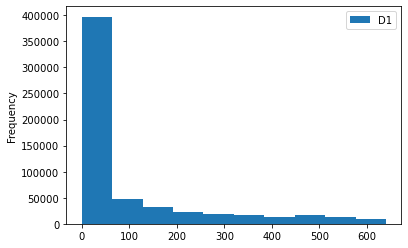

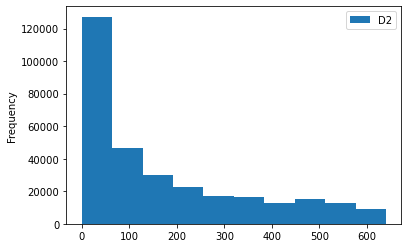

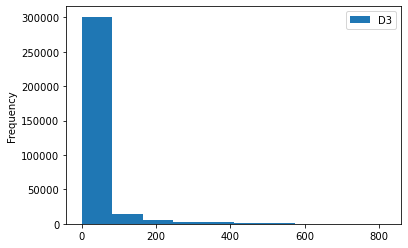

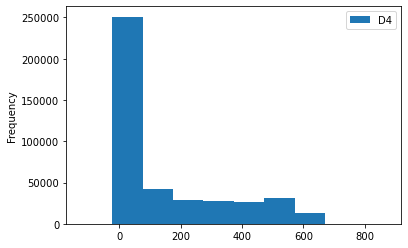

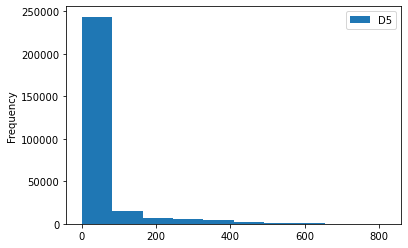

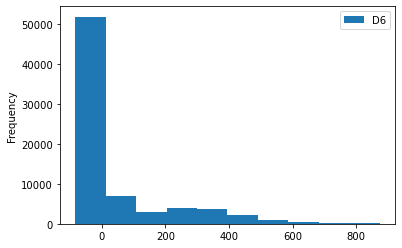

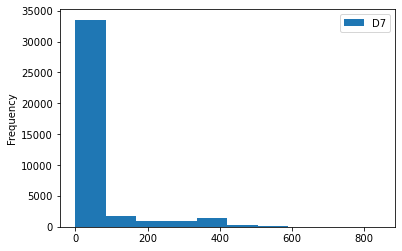

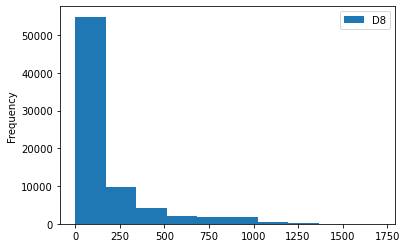

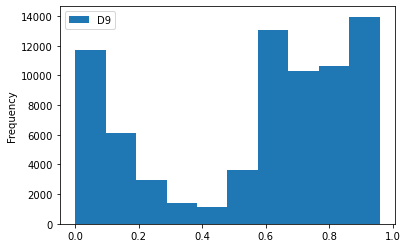

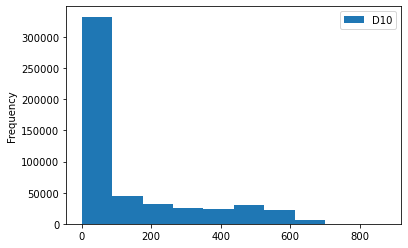

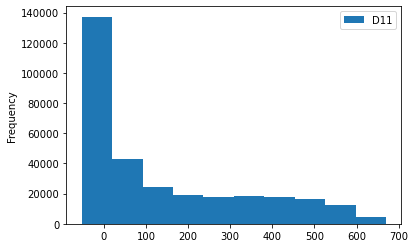

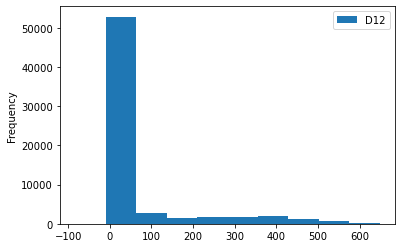

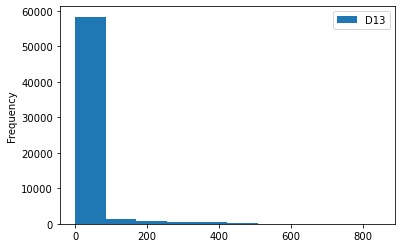

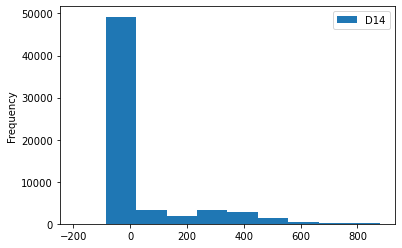

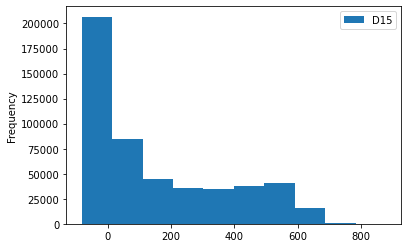

In [59]:
#컬럼 별 데이터 분포 그래프 그려보기 
for i in range(1, 16):
    print(d_column_df.plot("isFraud",f'D{i}',"hist"))

#### V-columns

In [80]:
v_column_df = train_transaction[[f'V{i}' for i in range(1,339) ]]
v_corr = v_column_df.corr()
v_corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338
V1,1.000000,0.032168,0.024830,0.014216,0.013619,0.032284,0.026016,0.040820,0.034009,0.006574,0.006408,0.007637,0.008270,NaN,NaN,NaN,NaN,NaN,0.005871,0.006044,NaN,NaN,0.001161,0.001575,0.027331,0.025159,NaN,NaN,0.003917,0.003880,NaN,NaN,0.000839,0.001147,0.005627,0.006161,0.015796,0.011898,NaN,NaN,0.462228,NaN,NaN,0.013945,0.011303,0.022933,0.017772,0.003084,0.003100,NaN,0.000827,0.001049,0.011176,0.011781,0.001193,0.001663,NaN,NaN,NaN,NaN,0.009989,0.008829,NaN,NaN,NaN,0.035722,0.029299,NaN,0.004744,0.003888,NaN,NaN,0.000902,0.001189,0.005683,0.006274,0.016217,0.011437,NaN,NaN,NaN,0.003580,0.003848,NaN,NaN,0.014608,0.011346,0.547708,NaN,0.003515,0.003476,NaN,NaN,0.000771,0.002168,0.002633,0.002445,0.001716,0.003042,0.002500,0.001285,0.001054,0.001222,0.001282,0.001249,0.001248,-0.000187,0.000373,0.000978,0.000625,0.000042,0.000452,0.000204,0.000575,0.001427,0.000901,-0.000073,0.000231,0.000031,0.000109,0.000530,0.000266,0.000972,0.002038,0.001370,0.000976,0.002172,0.001549,0.000993,0.002782,0.001956,0.000538,0.000905,0.000758,0.000654,0.000935,0.000761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002316,0.002493,0.001258,-0.001198,-0.000044,0.001905,0.002582,0.001077,0.002629,0.001421,0.001053,0.001580,0.001368,0.002206,0.001418,0.001172,0.001321,0.001271,0.001266,0.001256,0.001229,0.001080,0.001128,NaN,0.000013,0.000013,0.000019,0.001029,0.002044,0.001613,0.001129,0.002544,0.000554,0.002159,0.000923,0.001167,0.000591,0.000587,0.000983,0.000817,0.000694,0.000972,0.000816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2,0.032168,1.000000,0.773039,0.318554,0.305504,0.621459,0.496921,0.732730,0.618591,0.036884,0.037459,0.029382,0.039528,NaN,NaN,NaN,NaN,NaN,0.012414,0.016543,NaN,NaN,0.018433,0.023342,0.009550,0.019023,NaN,NaN,-0.027282,-0.026154,NaN,NaN,0.011982,0.018404,0.020577,0.035771,0.257406,0.225641,NaN,NaN,0.014784,NaN,NaN,0.048716,0.05230

In [ ]:
#V- columns들은 많으니까 0.5 이상인 애들만 보자 
'''
for i in range(1, 340)
    X = train_transaction.iloc[:,1]
    Y = train_transaction.iloc[:,i]
    if type(Y[1]) == str :
        pass
    corr_temp= np.corrcoef(X, Y)[0, 1]
    if abs(corr_temp) > 0.5:
        print(train_transaction.columns[i])'''

In [85]:
v_column_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338
count,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81951.000000,81945.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81951.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81945.000000,81945.000000,81945.000000,81951.000000,81951.000000,81951.000000,139631.000000,139631.000000,139819.000000,139819.000000,139819.000000,139631.000000,139631.000000,139819.000000,139819

In [94]:
less_than_10_vlist = []
for i in range(1,339):
    if v_column_df[f'V{i}'].nunique() < 10:
        less_than_10_vlist.append(v_column_df[f'V{i}'].name)
print(less_than_10_vlist)

['V1', 'V2', 'V4', 'V5', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V19', 'V21', 'V22', 'V25', 'V27', 'V28', 'V29', 'V30', 'V31', 'V33', 'V35', 'V36', 'V41', 'V42', 'V43', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V57', 'V61', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V73', 'V74', 'V75', 'V76', 'V79', 'V82', 'V83', 'V84', 'V85', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V107', 'V108', 'V109', 'V110', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V141', 'V173', 'V174', 'V194', 'V240', 'V241', 'V260', 'V286', 'V305']


<AxesSubplot:>

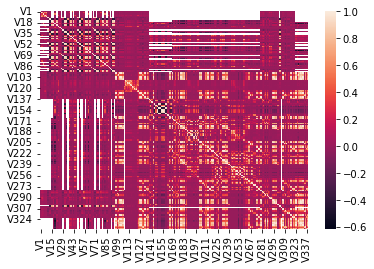

In [81]:
sns.heatmap(v_corr)

In [83]:
#nan 때문에 안돌아가기 때무네.. 결측치 처리 해줘야함 
pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(v_column_df.values, idx) for idx in range(v_column_df.shape[1])],
    "features": v_column_df.columns,
})

MissingDataError: exog contains inf or nans

##### discussion of this block
사용할 feature / reason
- D9 : column 들 중 가장 연관성 적음 하지만 결측치 처리 필요! 

#### M-columns

---

### 결측치 처리 방법 고민중 . . . 

- 평균 +/- 분산 -> 범위안에서 랜덤으로 선택
- 0 또는 지정된 숫자로 nan값을 채울 수가 있음 -> -999로 채우는 예시
	- 예) 전체 컬럼의 값이 0, 1, nan입니다. nan = -999로 채우면...
	 -> encoding: 0 -> 1 0 0 , 1 -> 0 1 0 ...
- 해당 컬럼의 이전값 또는 이후값으로 nan값을 채울 수 있음
- EDA를 통해서도 컬럼값을 채울 수 있음

In [ ]:
#결측치 확인 - email domain까지의 column 정보 보기
#transaction : 590540 
train_transaction.iloc[:,:55].info()

In [ ]:
#결측치 처리할 tr_trans 생성
#이메일 도메인까지 = 17
#M9까지 = 55 
tr_trans = train_transaction.iloc[:,:55]
tr_trans

In [4]:
#구매자 이메일 도메인 & isfraud 간의 상관관계 
train_transaction.groupby('P_emaildomain').mean().sort_values('isFraud')

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
P_emaildomain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
live.fr,3.331858e+06,0.000000,8.695814e+06,46.750268,9672.196429,433.267857,111.107143,203.339286,142.000000,59.000000,16.000000,79.714286,1.321429,4.232143,0.000000,1.303571,0.017857,1.321429,1.303571,1.857143,0.017857,1.946429,1.321429,1.303571,2.053571,1.267857,4.981818,8.303030,5.242424,1.759259,1.500000,1.792453,1.500000,83.946430,0.589285,0.000000,0.000000,1.792453,1.055556,16.188679,2.722222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.018182,0.018182,1.000000,0.963636,0.963636,1.018182,1.018182,0.981818,0.981818,0.945455,0.945455,1.018182,1.018182,0.981818,0.981818,0.000000,0.000000,0.018182,0.018182,0.963636,0.963636,0.963636,0.963636,0.018519,0.018519,2.759259,3.444444,0.981481,1.425926,1.000000,1.129630,1.462963,1.074074,1.203704,1.018519,1.018519,0.018519,0.018519,0.981481,1.000000,1.000000,0.017857,0.017857,2.482143,3.089286,0.982143,1.089286,0.982143,1.303571,1.000000,1.107143,1.053571,1.392857,1.000000,1.017857,1.125000,0.000000,0.017857,0.017857,0.982143,1.089286,1.000000,1.107143,0.018519,0.018519,2.685185,3.407407,1.000000,0.981481,1.425926,1.000000,1.018519,1.074074,1.425926,1.055556,1.203704,1.000000,0.000000,0.018519,0.018519,0.981481,1.000000,0.981481,0.017857,0.017857,0.017857,0.000000,0.000000,0.000000,0.017857,0.017857,0.017857,0.000000,0.000000,0.000000,1.000000,1.017857,1.017857,1.017857,1.017857,1.017857,1.017857,1.017857,1.017857,1.017857,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.017857,1.017857,1.017857,0.113571,0.113571,0.113571,0.000000,0.000000,0.000000,0.113571,0.113571,0.113571,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.339623,1.490566,1.358491,2.358491,2.509434,0.320755,0.169811,0.47169

In [ ]:
#시간대 변환 
tr_trans['DateTime'] = ((tr_trans.TransactionDT/3600)%24).astype(int) 
tr_trans.info()

In [ ]:
tr_trans.DateTime.unique() #country code? 

In [ ]:
tr_trans.iloc[:,17]

In [ ]:
#결측 비율 10% 이하만 데려오기 
trans_name = []
for i in range(1, 55):
    if ( tr_trans.iloc[:,i].isna().sum() / len(tr_trans.iloc[:,0]) ) < 0.1:
        trans_name.append(tr_trans.iloc[:,i].name)
trans_name.insert(0,'TransactionID')
tr_trans = tr_trans[trans_name]
tr_trans.info()

In [18]:
#test for module
'''
def cut_column_90(df):
    identity_name = []
    for i in range(2, len(df.iloc[0,:]) ):
        if (df.iloc[:, i].isnull().sum() / len(df.iloc[:, 0])) < 0.1:
            identity_name.append(df.iloc[:, i].name)
    identity_name.insert(0, train_transaction.iloc[:, 0].name)
    df = df[identity_name]
    return df
    print(df.info())
cut_column_90(train_transaction)'''

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,135.0,50.0,1404.0,790.0,0.000000,0.000000,0.000000,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1

In [ ]:
#결측치 있는 row 채울 방법이 마땅치 않음 - 578245 row 
tr_trans = tr_trans.dropna()
tr_trans.info()

--- 

transaction으로만 EDA? 
이유 
 - identity column info 가 부족해서 merge 로 해서 얻을 수 있는 정보가 한정적 
 - indentity table의 결측치가 너무 많아 merge한 이후의 데이터만 사용하면 손실이 너무 큼 

In [ ]:
tr_trans.describe()


points 

In [ ]:
tr_trans.describe(include=['O'])

- ProductCD 의 결측치는 W 로 채워도 무방할듯함 (뭘 뜻하는진 모르겠지만..)
-  card 4와 card6도 freq가 꽤 높지만, 카드 브랜드 혹은 체크카드/신용카드에 대한 분류이기 때문에 채우기 애매해보임 

---

In [ ]:
#identity table 전처리 
train_identity.info()

In [17]:
#identity table 전처리 - 살릴 column만 데려오기 
#기준: 결측치 10% 미만 
identity_name = []
for i in range(1, 41):
    if ( train_identity.iloc[:,i].isnull().sum() / len(train_identity.iloc[:,0]) ) <  0.1 :
        identity_name.append(train_identity.iloc[:,i].name)
identity_name.insert(0,'TransactionID')
tr_id = train_identity[identity_name]
tr_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_05          136865 non-null  float64
 4   id_06          136865 non-null  float64
 5   id_11          140978 non-null  float64
 6   id_12          144233 non-null  object 
 7   id_15          140985 non-null  object 
 8   id_17          139369 non-null  float64
 9   id_19          139318 non-null  float64
 10  id_20          139261 non-null  float64
 11  id_28          140978 non-null  object 
 12  id_29          140978 non-null  object 
 13  id_31          140282 non-null  object 
 14  id_35          140985 non-null  object 
 15  id_36          140985 non-null  object 
 16  id_37          140985 non-null  object 
 17  id_38          140985 non-nul

In [18]:
#결측치 일단 지워보기 - 136382 row 
tr_id = tr_id.dropna()
tr_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136382 entries, 1 to 144232
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  136382 non-null  int64  
 1   id_01          136382 non-null  float64
 2   id_02          136382 non-null  float64
 3   id_05          136382 non-null  float64
 4   id_06          136382 non-null  float64
 5   id_11          136382 non-null  float64
 6   id_12          136382 non-null  object 
 7   id_15          136382 non-null  object 
 8   id_17          136382 non-null  float64
 9   id_19          136382 non-null  float64
 10  id_20          136382 non-null  float64
 11  id_28          136382 non-null  object 
 12  id_29          136382 non-null  object 
 13  id_31          136382 non-null  object 
 14  id_35          136382 non-null  object 
 15  id_36          136382 non-null  object 
 16  id_37          136382 non-null  object 
 17  id_38          136382 non-nul

In [19]:
#tr table들 join - 67233 row 남음ㅎ
tr_join = pd.merge(left = tr_trans, right =  tr_id , how = "inner", on = "TransactionID")
tr_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134695 entries, 0 to 134694
Data columns (total 44 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   134695 non-null  int64  
 1   isFraud         134695 non-null  int64  
 2   TransactionDT   134695 non-null  int64  
 3   TransactionAmt  134695 non-null  float64
 4   ProductCD       134695 non-null  object 
 5   card1           134695 non-null  int64  
 6   card2           134695 non-null  float64
 7   card3           134695 non-null  float64
 8   card4           134695 non-null  object 
 9   card5           134695 non-null  float64
 10  card6           134695 non-null  object 
 11  C1              134695 non-null  float64
 12  C2              134695 non-null  float64
 13  C3              134695 non-null  float64
 14  C4              134695 non-null  float64
 15  C5              134695 non-null  float64
 16  C6              134695 non-null  float64
 17  C7        

In [20]:
tr_trans.corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1
TransactionID,1.000000,0.015424,0.998279,0.013620,0.008006,-0.019937,-0.010889,-0.028352,-0.053394,-0.055451,-0.009221,-0.057524,0.024629,-0.050622,-0.059749,-0.060739,0.033745,-0.062328,-0.054376,-0.059057,-0.017581,-0.043367,0.074444
isFraud,0.015424,1.000000,0.014422,0.011886,-0.015425,0.003077,0.157309,-0.035083,0.030685,0.037201,-0.006817,0.030227,-0.030281,0.020948,0.027941,0.031984,-0.031271,0.028100,0.027511,0.031752,-0.010877,0.008045,-0.068503
TransactionDT,0.998279,0.014422,1.000000,0.013520,0.008501,-0.019242,-0.012030,-0.028638,-0.049548,-0.051381,-0.007882,-0.053384,0.023979,-0.046850,-0.055657,-0.056528,0.033006,-0.057980,-0.050425,-0.054990,-0.015134,-0.039953,0.074128
TransactionAmt,0.013620,0.011886,0.013520,1.000000,-0.002572,0.016591,-0.110756,0.006768,-0.017463,-0.018222,-0.004739,-0.010011,-0.029964,-0.016605,-0.017079,-0.014783,-0.029261,-0.015933,-0.017035,-0.017151,-0.039370,-0.021951,-0.038560
card1,0.008006,-0.015425,0.008501,-0.002572,1.000000,0.004302,0.001731,-0.101043,0.005463,0.004843,-0.004949,0.004882,0.006504,0.006415,0.004161,0.004222,0.004869,0.003333,0.005545,0.003718,0.004366,0.007353,-0.008563
card2,-0.019937,0.003077,-0.019242,0.016591,0.004302,1.000000,0.024050,0.030452,0.006022,0.007283,0.006909,0.012470,-0.019294,0.005089,0.008643,0.010831,-0.024618,0.011052,0.006907,0.008606,-0.008693,0.001499,-0.007227
card3,-0.010889,0.157309,-0.012030,-0.110756,0.001731,0.024050,1.000000,-0.161261,0.081726,0.095030,-0.010815,0.091282,-0.062061,0.068069,0.107875,0.102827,-0.076994,0.103855,0.080871,0.108434,0.006187,0.047876,-0.104759
card5,-0.028352,-0.035083,-0.028638,0.006768,-0.101043,0.030452,-0.161261,1.000000,-0.016319,-0.019198,-0.004081,-0.022526,0.027370,-0.012252,-0.023831,-0.023912,0.033030,-0.023323,-0.016443,-0.023843,0.011871,-0.006855,0.099330
C1,-0.053394,0.030685,-0.049548,-0.017463,0.005463,0.006022,0.081726,-0.016319,1.000000,0.995157,-0.003473,0.968123,0.164672,0.982337,0.927044,0.968112,0.174702,0.958612,0.996534,0.928723,0.775901,0.952077,0.004450
C2,-0.055451,0.037201,-0.051381,-0.018222,0.004843,0.007283,0.095030,-0.019198,0.995157,1.000000,-0.003347,0.972405,0.125608,0.975041,0.939516,0.976143,0.132561,0.970919,0.993956,0.940898,0.752752,0.936653,0.000279


<AxesSubplot:>

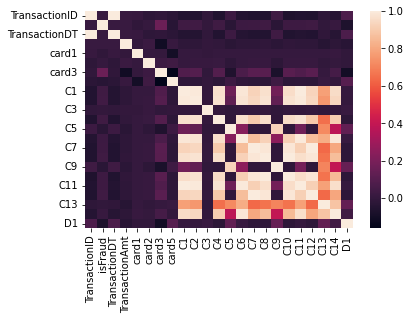

In [21]:
sns.heatmap(tr_trans.corr())

In [30]:
#C value 들간 상관계수가 심상치 않아보인다 - 상관계수가 높은 것들은 제거 가능 
tr_trans[[f'C{i}' for i in range(1,15) ]].corr()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
C1,1.000000,0.995157,-0.003473,0.968123,0.164672,0.982337,0.927044,0.968112,0.174702,0.958612,0.996534,0.928723,0.775901,0.952077
C2,0.995157,1.000000,-0.003347,0.972405,0.125608,0.975041,0.939516,0.976143,0.132561,0.970919,0.993956,0.940898,0.752752,0.936653
C3,-0.003473,-0.003347,1.000000,-0.001733,-0.008122,-0.004721,-0.001742,-0.001218,-0.010103,-0.001510,-0.003592,-0.001776,-0.007763,-0.005092
C4,0.968123,0.972405,-0.001733,1.000000,-0.012861,0.962749,0.896054,0.960335,-0.015997,0.952866,0.974835,0.895581,0.647108,0.908629
C5,0.164672,0.125608,-0.008122,-0.012861,1.000000,0.231009,-0.009993,-0.011679,0.925823,-0.011873,0.167704,-0.009899,0.715160,0.376989
C6,0.982337,0.975041,-0.004721,0.962749,0.231009,1.000000,0.859916,0.922724,0.249147,0.915248,0.991163,0.859514,0.809611,0.984340
C7,0.927044,0.939516,-0.001742,0.896054,-0.009993,0.859916,1.000000,0.983159,-0.012430,0.985189,0.916090,0.999490,0.635048,0.796550
C8,0.968112,0.976143,-0.001218,0.960335,-0.011679,0.922724,0.983159,1.000000,-0.014526,0.996973,0.963139,0.983205,0.655765,0.861534
C9,0.174702,0.132561,-0.010103,-0.015997,0.925823,0.249147,-0.012430,-0.014526,1.000000,-0.014769,0.181159,-0.012244,0.701784,0.395307
C10,0.958612,0.970919,-0.001510,0.952866,-0.011873,0.915248,0.985189,0.996973,-0.014769,1.000000,0.956510,0.983946,0.656482,0.854356


In [22]:
#상관계수 다 돌려보기 - 0.5 이상인 column filtering.. 실패
'''for i in range(2, 32):
    X = tr_join.iloc[:,1]
    Y = tr_join.iloc[:,i]
    if type(Y[1]) == str :
        pass
    corr_temp= np.corrcoef(X, Y)[0, 1]
    if abs(corr_temp) > 0.5:
        print(train_transaction.columns[i]) '''


'for i in range(2, 32):\n    X = tr_join.iloc[:,1]\n    Y = tr_join.iloc[:,i]\n    if type(Y[1]) == str :\n        pass\n    corr_temp= np.corrcoef(X, Y)[0, 1]\n    if abs(corr_temp) > 0.5:\n        print(train_transaction.columns[i]) '

In [23]:
#전처리 후 EDA 
#tr_tran
#tr_id
#tr_join

join 전 체크리스트
 - transaction 데이터의 ID: 590430
 - identity 데이터의 ID: 144233 
-> 

To do list 

(0608)
- 결측치 90% 따오는거 함수화하기
- 결측치 10% 이상인 애들 어떻게 전처리할지? 결측치 많아도 유의미하다면 버리면 안됨.. 
- 알파벳으로 시작하는 column들 어떤 것 삭제할지 고민하기 : 근거 데려오기


(0609)
- VIF?  



#### column 별 의미 정리   
 
<b> transaction table </b>   
TransactionID	
isFraud	: target value
TransactionDT	: 기준일로부터 value - 86400 초 지난 시간 
    -> 일 / 월 기준으로 변환 가능해보임 
TransactionAmt: USD 달러 기준 결제 금액 
ProductCD	: project code, 물건에 한정되는 게 아니라 무형의 서비스일 수도 있음
    (= 엄청 비싼게 fraud가 아니라 서비스일수도..?)
card1	card2 : float
card3	: float (addr2 와 상관계수 높음, -0.579210) <br>
card4 : 카드사    
card5 : float   
card6 : 직불(체크)카드 혹은 신용카드 여부    
    -> 인코딩 가능해보임
addr1 : 구매자 주소 (region)  
addr2 : 구매자 주소 (country)  -> North America, Latin America, Europe    
dist1	dist2	

P_emaildomain: 구매자 email 도메인
    -> protonmail.com 에서 사기결제 건수일 확률이 40% ..?   <br>
R_emaildomain: 판매자 email 도메인  <br>
C1 - C14	-> C feautre 간 상관계수가 높은 것들을 제거해서 줄이기 가능할 것 같음 <br>
D1 - D15	
M1 - M9	-> 결측치 아무거나 넣어보기 (결측치 많긴 한데 T/F의 차이가 유의미해서 한 번 쯤 체크해봐야함..) 
V1 - V339

 - column 선택   
 
<b> identity table </b>   
     TransactionID : 모든 tracking이 불가능해 transaction table에 비해 결측치가 많음 <br>
     id_01	id_02	id_03	id_04	id_05	id_06	id_07	id_08	id_09	id_10	id_11	id_12	id_13	
     id_14 : time zone  <br>
         -> categorical 로 처리 가능  
      id_15	id_16	id_17	id_18	id_19	id_20	id_21	id_22	id_23	id_24	id_25	id_26	id_27	id_28	id_29	
     id_30
     id_31 : 사용한 운영체제?	
     id_32 : 브라우저 <br>
     id_33	id_34	id_35	id_36	id_37	id_38	
     DeviceType : mobile or desktop
     DeviceInfo
     
     포함하는 내용 : device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page,

test data에 대한 전처리 방법 생각해야함 

In [ ]:
test_identity = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_identity.csv')
test_transaction = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_transaction.csv')


In [ ]:
test_transaction.iloc[:,:55].info()

In [ ]:
#train verses test data 의 DT - 겹치지 않는다 / 학습과 검증은 시간 기준으로 나누어졌다. 
plt.hist(train_transaction['TransactionDT'], label='train');
plt.hist(test_transaction['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');